### Challenge 2 - Random Forest Algorithm!

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn import datasets

In [18]:
#1) Load data, Prepare for training

data_bill = pd.read_csv('bill_authentication.csv')
data_bill.head()

#Features for training
X = data_bill.drop('Class', axis=1)
y = data_bill['Class']


Variance    -7.0421
Skewness   -13.7731
Curtosis    -5.2861
Entropy     -8.5482
dtype: float64

In [25]:
#2) Scale and Normalize the Features Using Min-Max
scaler = MinMaxScaler()
X_Normalized = scaler.fit_transform(X)
X_Normalized

array([[0.76900389, 0.83964273, 0.10678269, 0.73662766],
       [0.83565902, 0.82098209, 0.12180412, 0.64432563],
       [0.78662859, 0.41664827, 0.31060805, 0.78695091],
       ...,
       [0.23738543, 0.01176814, 0.98560321, 0.52475518],
       [0.25084193, 0.20170105, 0.76158701, 0.6606745 ],
       [0.32452819, 0.49074676, 0.34334762, 0.88594888]])

In [45]:
#3) Train Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_Normalized, y, test_size=0.2, random_state=20)

#Random Forest
rf_classification = RandomForestClassifier(n_estimators=10, random_state=20)

#Train RF on data
rf_classification.fit(X_train, y_train)

#Predict
y_prediction = rf_classification.predict(X_test)
y_prediction


array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [44]:
#4) Evaluate Accuracy
accuracy = accuracy_score(y_test, y_prediction)
print(f'Random Forest Accuracy is {accuracy}')

#The Random Forest algo can predict with very high accuracy while not being dependent on the number of trees (n_estimators). This probably has to do with the low amount of classification inputs (only 4), and the high accuracy of the data after min-max normalization.

Random Forest Accuracy is 0.9963636363636363


(95.0, 100.0)

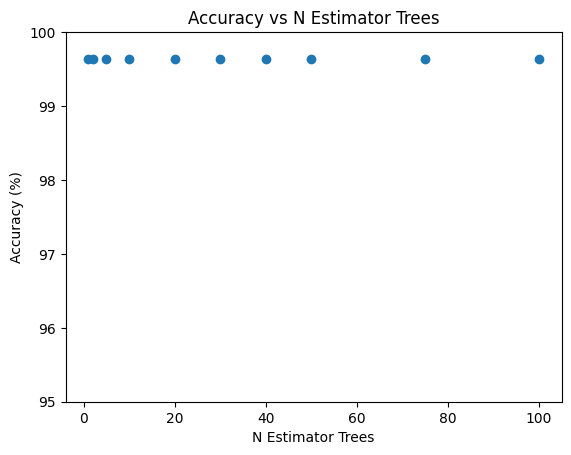

In [56]:
#5) Visual Representation 
n_estimate = [1,2,5,10,20,30,40,50,75,100]
accuracy_values = []

for num in n_estimate:
  rf_classification = RandomForestClassifier(n_estimators=10, random_state=20)

  #Train RF on data
  rf_classification.fit(X_train, y_train)

  #Predict
  y_prediction = rf_classification.predict(X_test)
  
  accuracy_values.append(accuracy_score(y_test, y_prediction)*100)
  
#Showing different accuracy values based on n_estimators (trees)
plt.scatter(x=n_estimate, y=accuracy_values)
plt.title('Accuracy vs N Estimator Trees')
plt.xlabel('N Estimator Trees')
plt.ylabel('Accuracy (%)')

plt.ylim(95,100)
